<a href="https://colab.research.google.com/github/a-singh03/BDDA/blob/main/BDDA_Project2_Group1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BDDA PROJECT 2**

Submitted By:

Ankita Singh - 035011

Anmol Bhardwaj - 035012

Shruti Tiwari - 035052

**Objective: To perform data pre-processing and pipelining with PCA and XGBoost.**

**Importing Libraries**

**Kaggle:** https://www.kaggle.com/code/ksavleen/xgboost-gpu-passenger-satisfaction-level

In [ ]:
#Loading Libraries and Data

import pandas as pd #Dataframe Manipulation library
import numpy as np #Data Manipulation library

#sklearn modules for Decision Trees
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, DMatrix
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import itertools
from sklearn.metrics import mean_absolute_error,accuracy_score

#Libraries for HyperParameter Tuning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Libraries for Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import plotly.graph_objects as go

import joblib  #python package to store entire logic of a variable in python

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


**Reading the data**

In [ ]:
#Read random chunks of 10% of data

path = "/gdrive/MyDrive/bdda1/bdda1/"

In [ ]:
data = pd.read_csv(path + "train.csv")

In [ ]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
data.describe(exclude=np.number)

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


**DATA VISUALISATION**

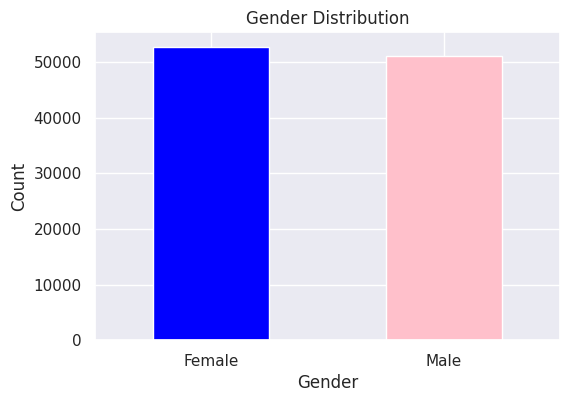

In [ ]:
# Using Matplotlib
plt.figure(figsize=(6, 4))
data['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show();

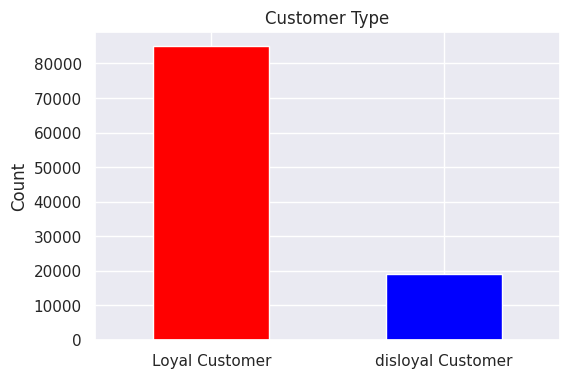

In [ ]:
#Chart for cutomer type
plt.figure(figsize=(6, 4))
data['Customer Type'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Customer Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show();

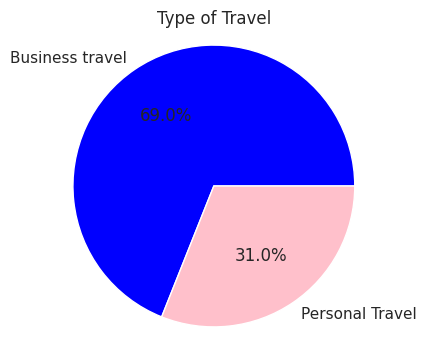

In [ ]:
#Pie chart for Type of Travel
travel = data['Type of Travel'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(travel, labels=travel.index, autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title('Type of Travel')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show();

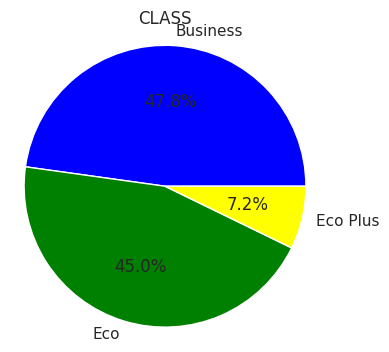

In [ ]:
#Pie chart for Passanger Class
Class = data['Class'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(Class, labels=Class.index, autopct='%1.1f%%', colors=['blue', 'green', 'yellow'])
plt.title('CLASS')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show();

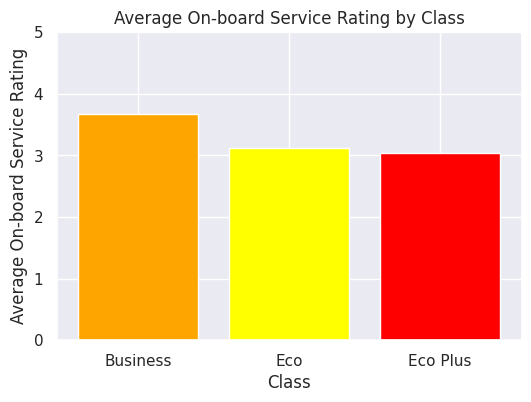

In [ ]:
# Group the data by 'Gender' and calculate the average 'On-board Service' rating
grouped_data = data.groupby('Class')['On-board service'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(grouped_data['Class'], grouped_data['On-board service'], color=['orange', 'yellow', 'red'])
plt.xlabel('Class')
plt.ylabel('Average On-board Service Rating')
plt.title('Average On-board Service Rating by Class')
plt.ylim(0, 5)  # Set the y-axis limit to the rating scale (1 to 5)
plt.show();

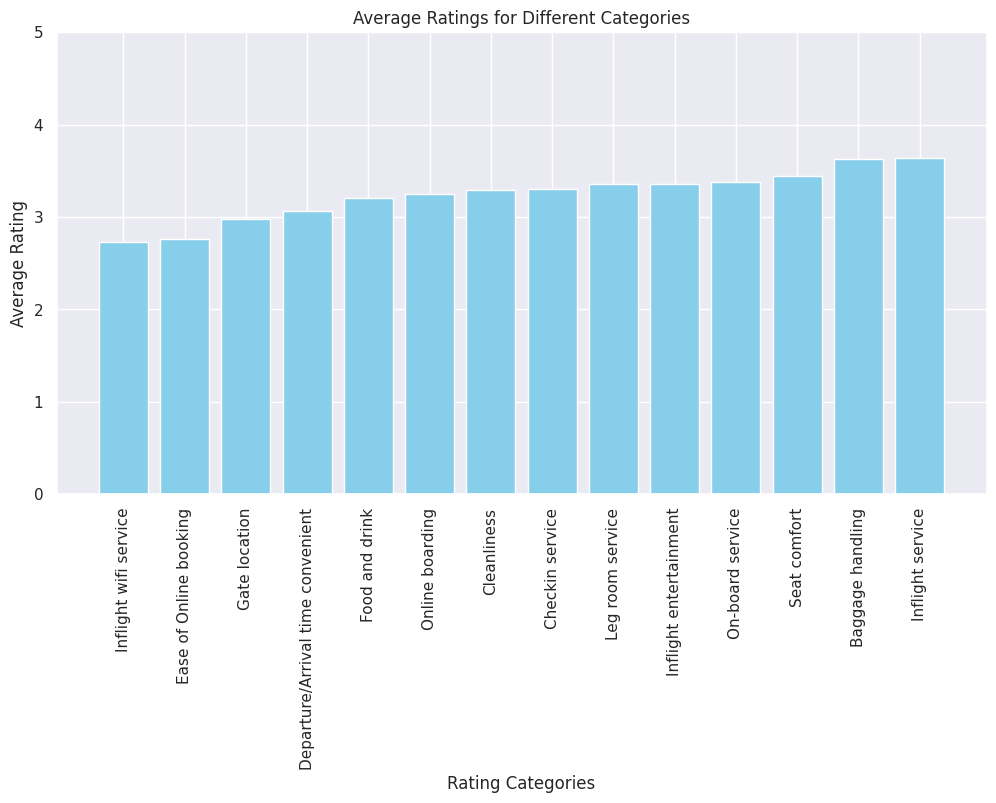

In [ ]:
# Select only the rating columns for averaging
rating_columns = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'
]

# Calculate the average rating for each column
average_ratings = data[rating_columns].mean()

# Sort the average ratings in ascending order
average_ratings_sorted = average_ratings.sort_values()

# Create a bar plot to visualize the average ratings
plt.figure(figsize=(12, 6))
plt.bar(average_ratings_sorted.index, average_ratings_sorted.values, color='skyblue')
plt.xlabel('Rating Categories')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Different Categories')
plt.xticks(rotation=90)
plt.ylim(0, 5)  # Set the y-axis limit to the rating scale (1 to 5)
plt.show();

**Insights from the data:**
- Number of female customers are higher than the male cutomers
- 18% cutomers in the data set are under the disloyal category and might have an upper hand in terms of the dissatisfaction level in the airline
- Majority of the travel is done for business purpose
- Almost half of the passengers travel in business class

In [ ]:
print("The dataset columns are: ")
print(data.columns)
print(f"\nThe datatypes are : {data.dtypes}")
print(f"\nThe size of Training dataset is: {data.shape}")

The dataset columns are: 
Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

The datatypes are : Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int

In [ ]:
data["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [ ]:
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied':1})

In [ ]:
#Keeping relevant features in the dataframe
df_feat = data.iloc[0:, 2:data.shape[1]-1]  #dropping 'Unnamed: 0', 'id',satisfaction
#df.shape[1] : number of columns in dataframe and 2: df.shape[1][-1] :: All columns from col with 2nd index upto last column
print(f"Features for training data are: {df_feat.columns}")


Features for training data are: Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')


In [ ]:

y = data.pop('satisfaction')

**Splitting the data in test and train**

In [ ]:
#Splitting the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(df_feat,y,
                                                   test_size = 0.1,
                                                   random_state = 41)
#we can consider entire data as training data instead of splitting as we have seperate test data

print(f"Shape of Input Training Dataset: {x_train.shape}")
print(f"Shape of Input Test Dataset: {x_test.shape}")
print(f"Shape of Target Training Dataset: {y_train.shape}")
print(f"Shape of Target Test Dataset: {y_test.shape}")

Shape of Input Training Dataset: (93513, 22)
Shape of Input Test Dataset: (10391, 22)
Shape of Target Training Dataset: (93513,)
Shape of Target Test Dataset: (10391,)


In [ ]:
data.isnull().sum().sum()

310

**Preprocessing of categorical and numerical data**

In [ ]:
#Seperating the categorical and numerical data
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes']

categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class',]
numerical_features = [feature for feature in features if feature not in categorical_features]

In [ ]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [ ]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,numerical_features),
        ('cat',categorical_transformer,categorical_features)
    ])


**Creating a pipeline with PCA and XGBClassifier**

In [ ]:
# Bundle preprocessing and modeling code in a pipeline
clf_xg = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('pca', PCA()),
    ('classifier',XGBClassifier() ) # Define model
])

**Fitting the data**

In [ ]:
# Preprocessing of training data, fit model
clf_xg.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment'...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

**Score**

In [ ]:
clf_score = clf_xg.score(x_test,y_test)*100
print(f"The score of the XGB Classifier model is: {clf_score:0.3f}")

The score of the XGB Classifier model is: 94.486


In [ ]:
# Preprocessing of validation data, get predictions
y_preds = clf_xg.predict(x_test)


**Hyperparameter Grid Tuning**

In [ ]:
#Hyperparameter grid Tuning

param_grid = {
    'preprocessor__num__imputer__strategy': ['mean','median'],
    'classifier__n_estimators' : [200,300],  #number of decision trees in random forest
    'classifier__learning_rate' : [0.1,0.2],
    'classifier__max_depth' : [4,6],
    'pca__n_components' : [20,25]
}

In [ ]:
grid_search_xg = GridSearchCV(clf_xg, param_grid, cv = 2, verbose = 1, n_jobs=-1, scoring = ['accuracy', 'roc_auc'], refit = 'roc_auc')

**Fitting the data after hyperparameter grid tuning**

In [ ]:
grid_search_xg.fit(x_train, y_train)


Fitting 2 folds for each of 32 candidates, totalling 64 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Flight '
                                                                          'Distance',
                                                                          'Inflight '
                                                                          'wifi '
                                                                          'service',
                                                                          'Departure/Arrival '
                                                                          'time '
                                                                          'convenient',
                                                                          'Ease '
                                                                          'of '
                                                                          'Online '
                                                                          'booking',
                                                                          'Gate '
                                                                          'location',
                                                                          'Food '
                                                                          'and '
                                                                          'drink',
                                                                          'Onlin...
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.1, 0.2],
                         'classifier__max_depth': [4, 6],
                         'classifier__n_estimators': [200, 300],
                         'pca__n_components': [20, 25],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

**Best Score & Best Parameter**

In [ ]:
f"Best score: {grid_search_xg.best_score_} "
print()
print()
f"Best parameter set {grid_search_xg.best_params_}"

'Best score: 0.9875354921315169 '

"Best parameter set {'classifier__learning_rate': 0.2, 'classifier__max_depth': 6, 'classifier__n_estimators': 300, 'pca__n_components': 25, 'preprocessor__num__imputer__strategy': 'median'}"

In [ ]:
#Make predictions using the best returned model
y_pred = grid_search_xg.predict(x_test)
print("--Few predictions--\n")
y_pred[:10]

--Few predictions--



array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

**Acuuracy Score**

In [ ]:
#Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0



--Accuracy Score--



95.02454046771246

In [ ]:
#Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)



--Confusion Matrix--



array([[5756,  184],
       [ 333, 4118]])

In [ ]:
#F1 score
from sklearn.metrics import accuracy_score, f1_score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test,y_pred, pos_label = 1)

print("\n\n--F1 Score pos-label: 0--\n")
f1_score(y_test,y_pred, pos_label = 0)



--F1 Score pos-label: 1--



0.940934536730264



--F1 Score pos-label: 0--



0.9570205337102003


**Feautures**

In [ ]:
print("\n\n--How many features--\n")
grid_search_xg.best_estimator_.named_steps["classifier"].feature_importances_.shape

# 7.9.1
print("\n\n---Feature importances---\n")
grid_search_xg.best_estimator_.named_steps["classifier"].feature_importances_



--How many features--



(25,)



---Feature importances---



array([0.25311992, 0.07636899, 0.02493042, 0.01249217, 0.18076952,
       0.04928893, 0.04015288, 0.01450235, 0.01318099, 0.01552279,
       0.01046238, 0.01162127, 0.02140762, 0.02073419, 0.02033776,
       0.0199476 , 0.01748146, 0.02907231, 0.0314284 , 0.01405414,
       0.0795312 , 0.02160696, 0.0102654 , 0.00594256, 0.00577786],
      dtype=float32)

In [ ]:
# Map feature importance values to original columns
original_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
importance_per_column = {}
feature_importances = grid_search_xg.best_estimator_.named_steps["classifier"].feature_importances_

for original_col in original_columns:
    related_cols = [col for col in x_train.columns if original_col in col]
    total_importance = sum(feature_importances[x_train.columns.get_loc(col)] for col in related_cols)
    num_related_cols = len(related_cols)
    average_importance = total_importance / num_related_cols
    importance_per_column[original_col] = average_importance

remaining_cols = [col for col in x_train.columns if col not in original_columns]
remaining_importance = [feature_importances[x_train.columns.get_loc(col)] for col in remaining_cols]

# Print the aggregated importance values for original columns
for col, importance in importance_per_column.items():
    print(f"{col}: {importance}")

# Print the importance values for the remaining columns
for col, importance in zip(remaining_cols, remaining_importance):
    print(f"{col}: {importance}")



Gender: 0.25311991572380066
Customer Type: 0.07636898756027222
Type of Travel: 0.012492174282670021
Class: 0.18076951801776886
Age: 0.024930419400334358
Flight Distance: 0.04928893223404884
Inflight wifi service: 0.04015287756919861
Departure/Arrival time convenient: 0.014502353966236115
Ease of Online booking: 0.013180991634726524
Gate location: 0.01552279107272625
Food and drink: 0.010462380945682526
Online boarding: 0.011621274054050446
Seat comfort: 0.02140762284398079
Inflight entertainment: 0.020734189078211784
On-board service: 0.02033776231110096
Leg room service: 0.019947599619627
Baggage handling: 0.01748145930469036
Checkin service: 0.02907230705022812
Inflight service: 0.03142840042710304
Cleanliness: 0.01405414380133152
Departure Delay in Minutes: 0.07953120023012161
Arrival Delay in Minutes: 0.021606961265206337


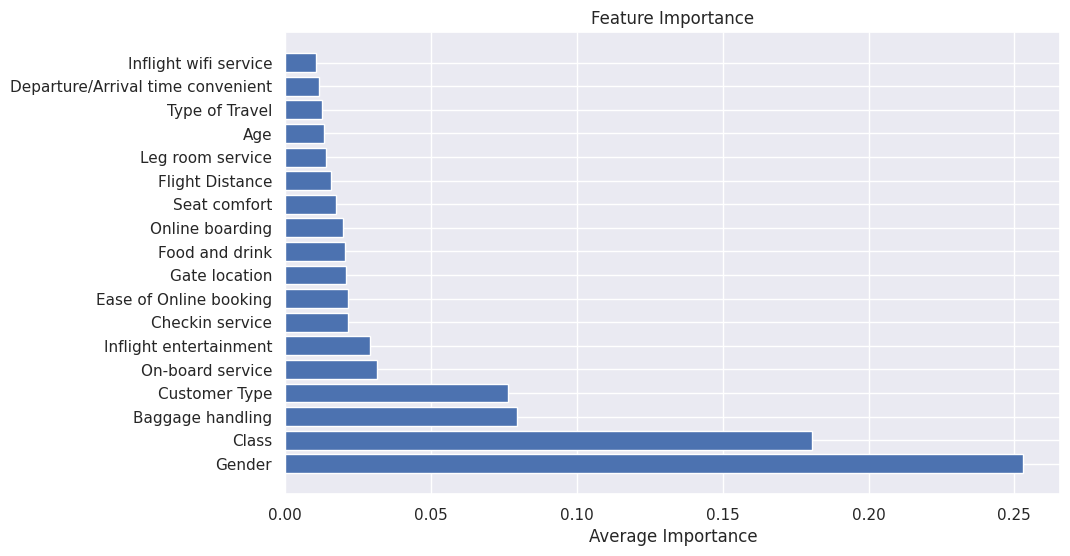

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Combine original columns and remaining columns
all_columns = original_columns + remaining_cols

# Combine importance values for original columns and remaining columns
all_importance = [importance_per_column.get(col, importance) for col, importance in zip(all_columns, remaining_importance)]

# Sort columns and importance values in descending order
sorted_columns, sorted_importance = zip(*sorted(zip(all_columns, all_importance), key=lambda x: x[1], reverse=True))

# Plot feature importance values in descending order
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_columns)), sorted_importance, align='center')
plt.yticks(range(len(sorted_columns)), sorted_columns)
plt.xlabel('Average Importance')
plt.title('Feature Importance')
plt.show();

**Plotting the ROC Curve**

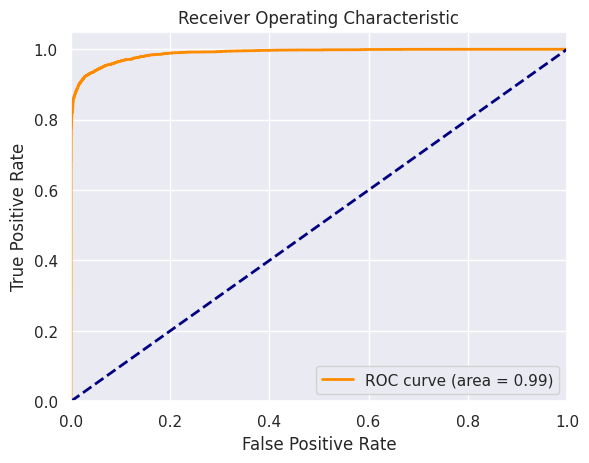

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a trained classifier named 'grid_search_xg'
y_pred = grid_search_xg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show();

**END**